In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 加载数据集
df = pd.read_csv('test_sentiment.csv')
# 检查数据类型和缺失值情况
print('数据基本信息：')
df.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [4]:
# 统计情感标签分布情况
sentiment_distribution = df['sentiment'].value_counts()
print('情感标签分布情况：')
print(sentiment_distribution)

情感标签分布情况：
sentiment
Neutral     1056
Positive     971
Negative     164
Name: count, dtype: int64


In [5]:
# 将 date 列转换为日期时间类型
df['date'] = pd.to_datetime(df['date'])

In [6]:
# 按年月统计情感标签数量
monthly_sentiment = df.groupby(df['date'].dt.to_period('M'))['sentiment'].value_counts().unstack(fill_value=0)
print('每月情感标签数量：')
print(monthly_sentiment)

每月情感标签数量：
sentiment  Negative  Neutral  Positive
date                                  
2010-01           7       46        38
2010-02           6       40        45
2010-03           9       47        35
2010-04           6       52        34
2010-05           7       40        44
2010-06           9       44        39
2010-07           7       46        38
2010-08           8       41        42
2010-09           6       48        37
2010-10           4       55        32
2010-11          14       42        35
2010-12           9       48        34
2011-01           4       47        40
2011-02           8       45        38
2011-03          11       38        43
2011-04           6       41        45
2011-05           8       41        43
2011-06           3       41        47
2011-07           5       41        45
2011-08           3       47        41
2011-09           2       39        50
2011-10           9       38        44
2011-11           6       41        45
2011-12        

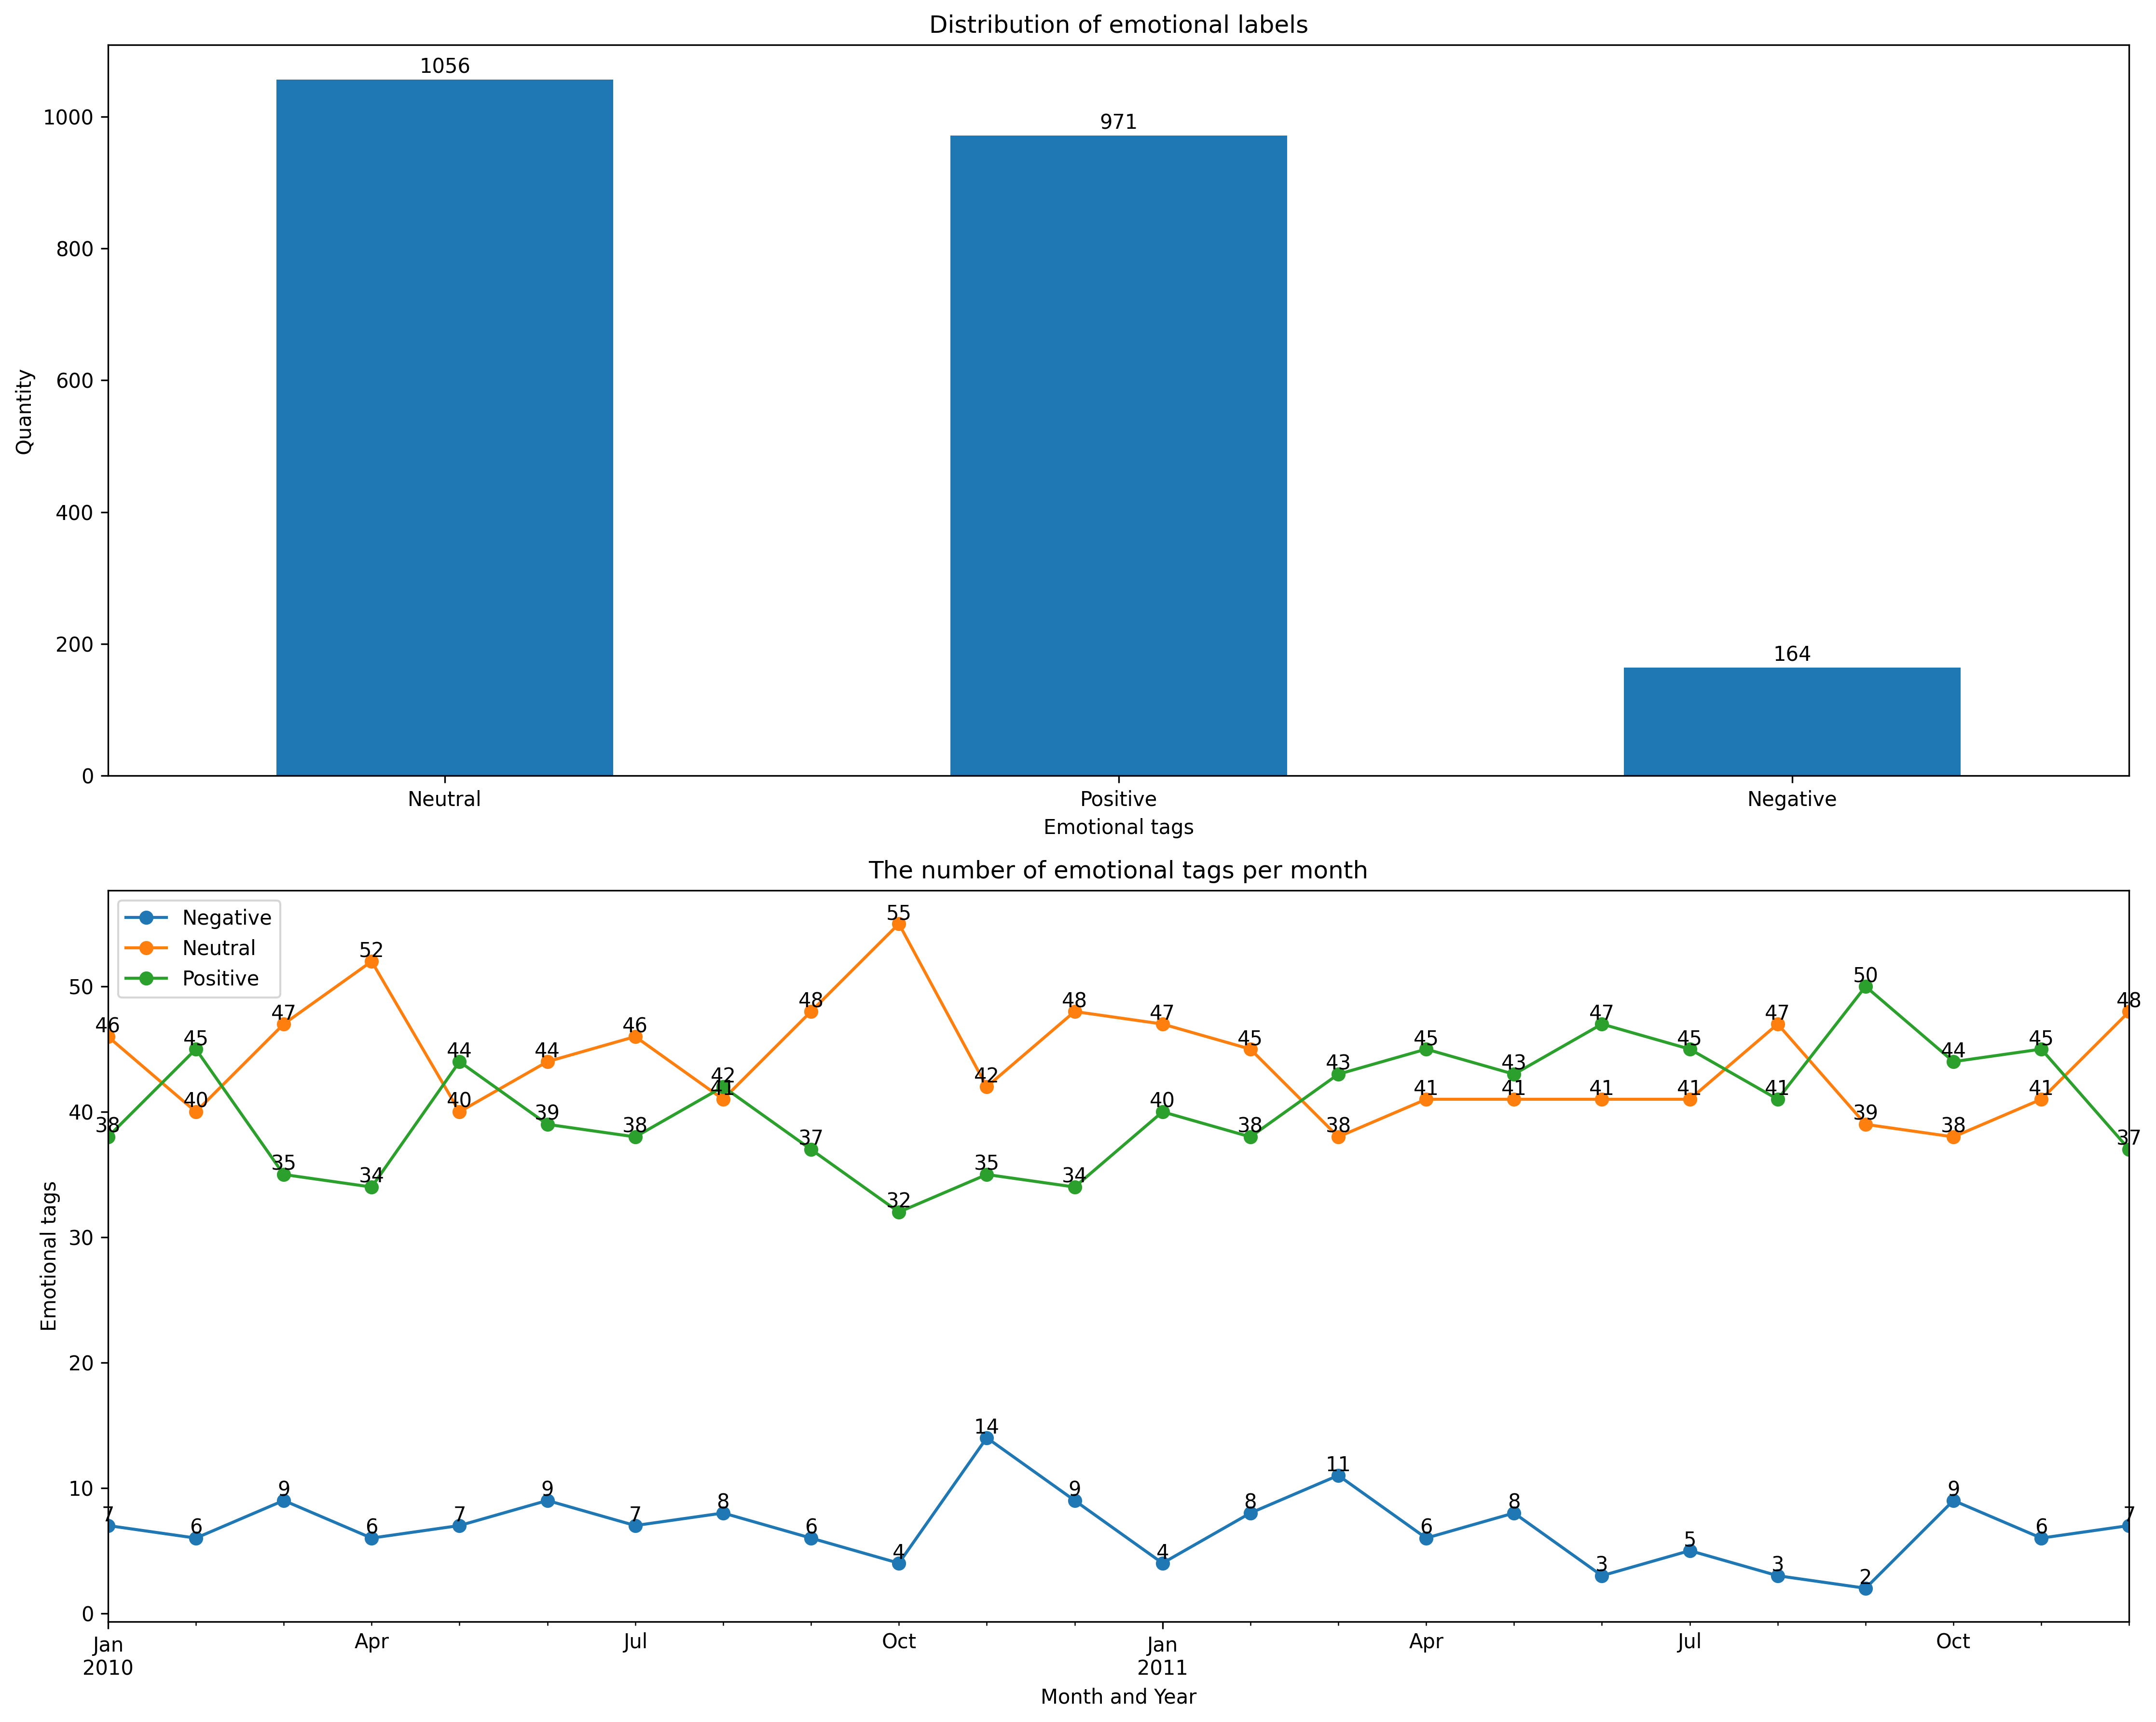

In [7]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 创建画布
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# 绘制情感标签分布柱状图
sentiment_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of emotional labels')
axes[0].set_xlabel('Emotional tags')
axes[0].set_ylabel('Quantity')
axes[0].tick_params(axis='x', rotation=0)

# 添加数据标签
for i, v in enumerate(sentiment_distribution):
    axes[0].text(i, v + 10, str(v), ha='center')

# 绘制每月情感标签数量折线图
monthly_sentiment.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('The number of emotional tags per month')
axes[1].set_xlabel('Month and Year')
axes[1].set_ylabel('Emotional tags')
axes[1].legend(title='')

# 添加数据标签
for line in axes[1].lines:
    y = line.get_ydata()
    for i, value in enumerate(y):
        axes[1].text(line.get_xdata()[i], value, str(int(value)), ha='center', va='bottom')

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()